In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
#number of missing values per attribute in data
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.21%


In [ ]:
total = missing_data.sort_values(ascending=False)
percent_total = (missing_data/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total Missing", "Percentage"])
missing

,Total Missing,Percentage
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585
TenYearCHD,0,0.000000
diaBP,0,0.000000
sysBP,0,0.000000


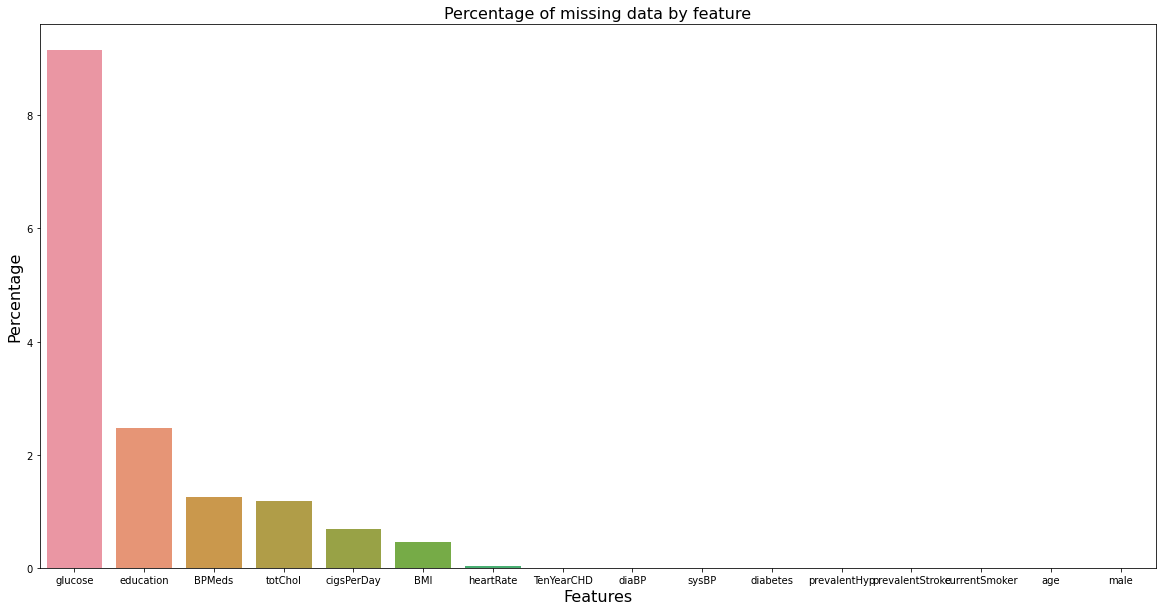

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=missing.index, y=missing['Percentage'], data = missing)
plt.title('Percentage of missing data by feature', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.show()

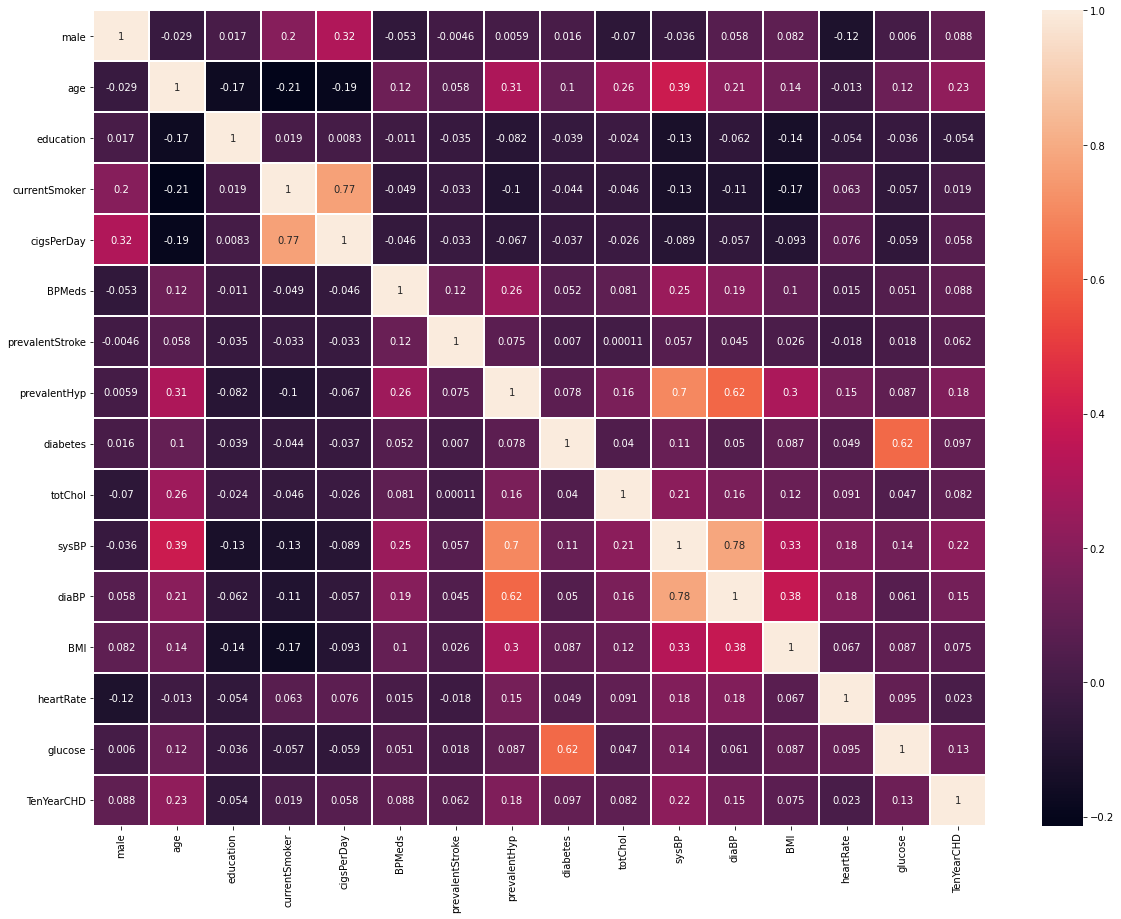

In [ ]:
correlation_mat = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_mat, annot = True, linewidths=1)

plt.show()

In [ ]:
# education can not have relation with CHD.
data.drop(['education'], axis=1, inplace=True)

In [ ]:
for value in ['cigsPerDay','BPMeds', 'totChol','BMI','glucose','heartRate']:
    data[value].fillna(round(data[value].mean()), inplace= True)

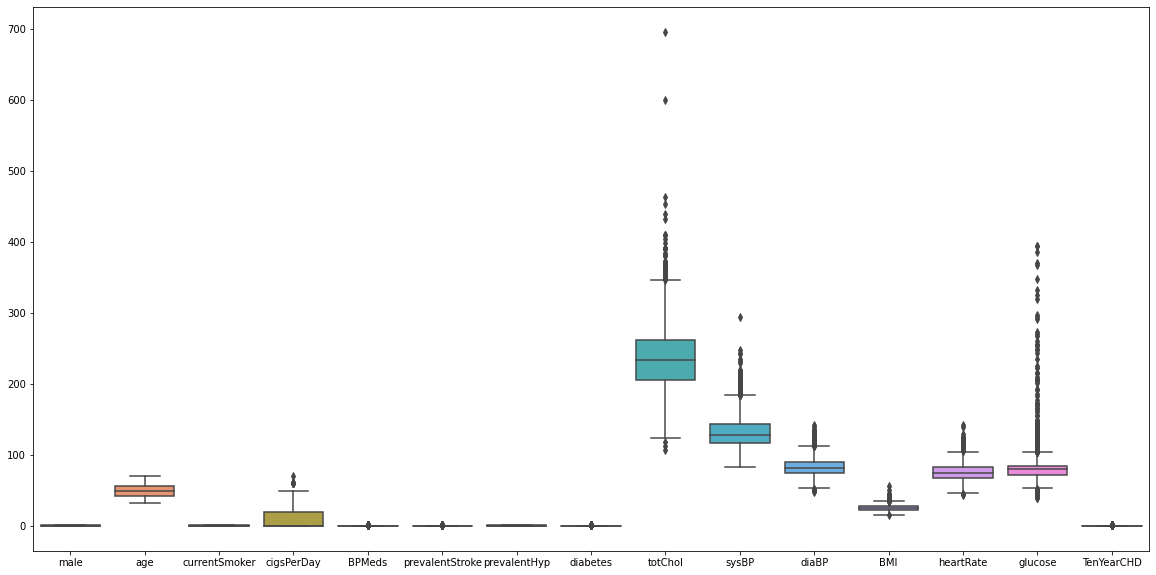

In [ ]:
# To check for outliers, we are plotting a box-whisker plot.

plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

In [ ]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005896,0.029245,0.005896,0.310613,0.025708,236.703066,132.354599,82.897759,25.801693,75.879009,81.966981,0.151887
std,0.495027,8.572942,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327533,22.033300,11.910394,4.070708,12.023930,22.831751,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:

data= data[data['totChol']<600.0]
data = data[data['sysBP']<295.0]
data.shape

(4237, 15)

In [ ]:
data=data.drop('cigsPerDay',axis=1)

In [ ]:
data.shape

(4237, 14)

In [ ]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
X = data.values[:,0:-1]
Y = data.values[:,-1]

In [ ]:
# Scaling The Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
Y.dtype

dtype('float64')

In [ ]:
Y= Y.astype(int)

In [ ]:
# Separate output column as Y and rest as X
#Y = data['TenYearCHD']
#X = data.drop(['TenYearCHD'], axis = 1)

In [ ]:
# Splitting data to train and test

from sklearn.model_selection import train_test_split

#Split the data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,
                                                    random_state=27)

**SVM**


In [ ]:
from sklearn.svm import SVC

svc_model= SVC(kernel="rbf",gamma=0.02,C= 80)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)

acc_SVr= svc_model.score(X_train,Y_train)
print("Training Accuracy of the model: ",acc_SVr)

#acc_SVr= accuracy_score(Y_test, Y_pred)
#print("Testing Accuracy of the model: ",acc_SVr)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_Svm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ")
print(cfm_Svm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_Svm=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_Svm)

Training Accuracy of the model:  0.8686928297432871
Confusion Matrix: 
[[719   6]
 [116   7]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.54      0.06      0.10       123

    accuracy                           0.86       848
   macro avg       0.70      0.52      0.51       848
weighted avg       0.81      0.86      0.80       848

Accuracy of the model:  0.8561320754716981


Stochastic Gradient Descent Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

#create a model
classifier=SGDClassifier(loss="log",random_state=27,eta0=0.1,alpha=0.01,max_iter=1000)

#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#Generating a confusion matrix, classification report and accuracy score to check again.

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_SGD=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ")
print(cfm_SGD)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_SGD=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_SGD)

Confusion Matrix: 
[[711  14]
 [112  11]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       725
           1       0.44      0.09      0.15       123

    accuracy                           0.85       848
   macro avg       0.65      0.54      0.53       848
weighted avg       0.80      0.85      0.81       848

Accuracy of the model:  0.8514150943396226


LOGISTIC REGRESSION

In [ ]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

# Generating confusion matrix, accuracy score and classification report to check score of our prediction.

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_LR=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(cfm_LR)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_LR=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_LR)

Confusion Matrix:
[[716   9]
 [114   9]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.07      0.13       123

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.52       848
weighted avg       0.81      0.85      0.81       848

Accuracy of the model:  0.8549528301886793
